# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [5]:
# Import the libraries you'll need here...

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import scipy.stats as stats

# Load the csv file into a pandas dataframe.


In [6]:
# Load the csv file into a pandas dataframe.

df=pd.read_csv('data/cars.csv')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [7]:
# 1. Print the number of duplicate rows we have in our dataframe.

print(df.duplicated().sum())
df.duplicated()

720


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [8]:
#  2. Modify our df to have all duplicate rows removed. 

df=df.drop_duplicates()

In [9]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.duplicated().sum())
df.duplicated()

0


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11194, dtype: bool

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [10]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [11]:
# * Print how long (aka how many rows) our dataframe is.

index = df.index
rows = len(index)
print(rows)

11194


In [12]:
# * Remove any row that has a null value in it. 

df = df.dropna()

In [13]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

print(df.shape)


(11092, 15)


### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

<AxesSubplot:>

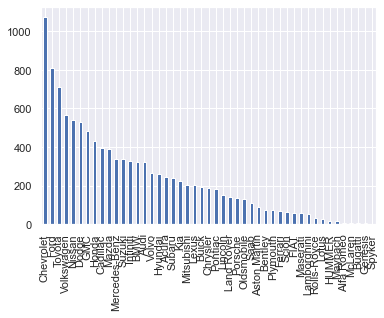

In [14]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

gb = df['Make'].value_counts()
gb.plot(kind='bar')

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

<AxesSubplot:>

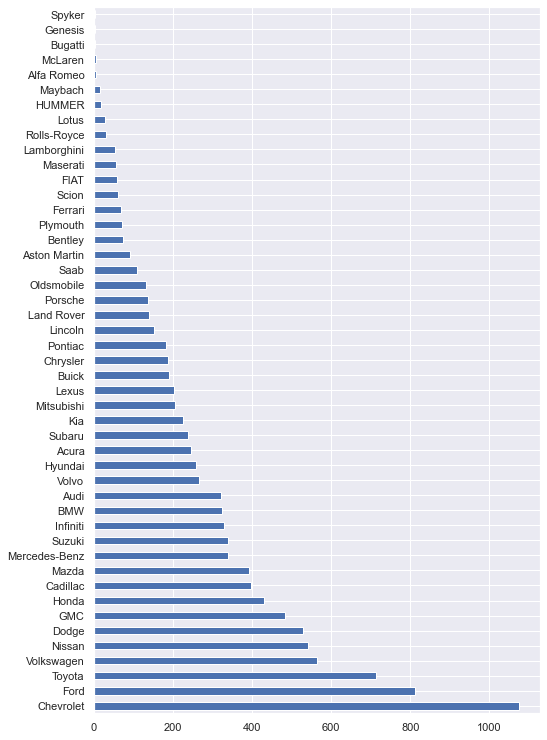

In [15]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

gb.plot(kind='barh',figsize=(8,13))


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

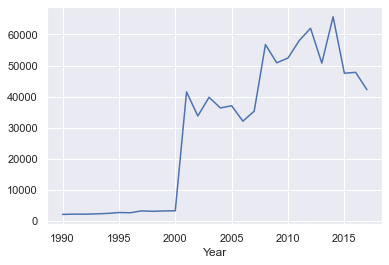

In [16]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

lb = df.groupby('Year')['MSRP'].mean() 
lb.plot()


# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [17]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

df['price_adjusted'] = np.where(df['Year'] <= 2000, 10, 1)
df['adjusted_price'] = df['MSRP'] * df['price_adjusted']


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

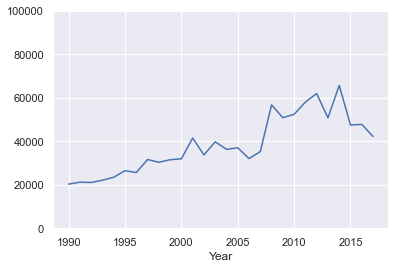

In [18]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

lb = df.groupby('Year')['adjusted_price'].mean()
lb.plot(ylim=(0,100000))

# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [19]:
# What are the top 5 car makers make the most expensive cars on average. 

df.groupby('Make')['adjusted_price'].mean().round(3).sort_values(ascending=False).head()


Make
Bugatti        1757223.667
Maybach         546221.875
Rolls-Royce     351130.645
Lamborghini     331567.308
Bentley         247169.324
Name: adjusted_price, dtype: float64

# What are the top 5 car makers that have the highest median highway MPG?

In [20]:
# Which car makers have the highest median highway MPG?

df.groupby('Make')['highway MPG'].median().sort_values(ascending=False).head()


Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

<AxesSubplot:xlabel='adjusted_price', ylabel='Count'>

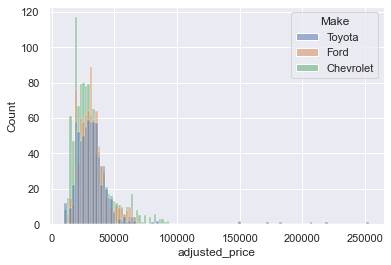

In [21]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

cars = ['Chevrolet', 'Ford', 'Toyota']
cl_df = df[df.Make.isin(cars)]
sns.histplot(data=cl_df, x='adjusted_price', hue='Make')

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

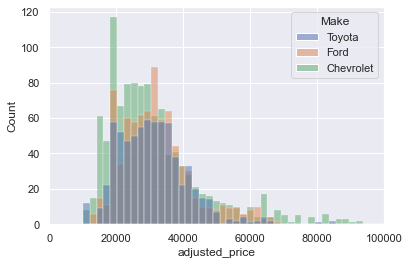

In [23]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

ax = sns.histplot(data=cl_df, x='adjusted_price', hue='Make')
ax.set_xlim(0, 100000)


# Plot the relationship between Engine HP and highway MPG

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


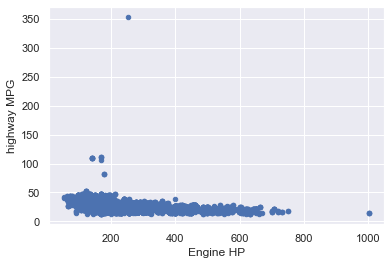

In [61]:
# Plot the relationship between Engine HP and highway MPG

df.plot(kind='scatter', x='Engine HP', y='highway MPG')


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

<ipython-input-25-6a63f280773d>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[c2]
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

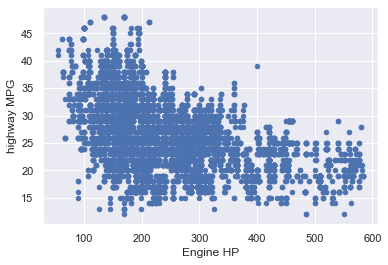

In [25]:
# Remove any statisical outliers from Engine HP and highway MPG

# Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
target_columns = ['Engine HP', 'highway MPG']

for col in target_columns:
    new_column_name = col + "_zscore"
    df[new_column_name] = stats.stats.zscore( df[col] )
    df[new_column_name] = abs(df[new_column_name])
    
#Create condition masks for when either of those absolute values are greater than 3.    
condition1 = df['Engine HP_zscore'] < 3   
condition2 = df['highway MPG_zscore'] < 3

#Create a new dataframe that is a copy of our dataframe using df.copy()
new_df = df.copy()

new_df = new_df[c1]

new_df = new_df[c2]

# Scatter plot of the HP and MPG
new_df.plot(kind='scatter', x='Engine HP', y='highway MPG')


# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('The plot tells us that as the Engine HP increases, the amount of highway MPG decreases.')

The plot tells us that as the Engine HP increases, the amount of highway MPG decreases.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

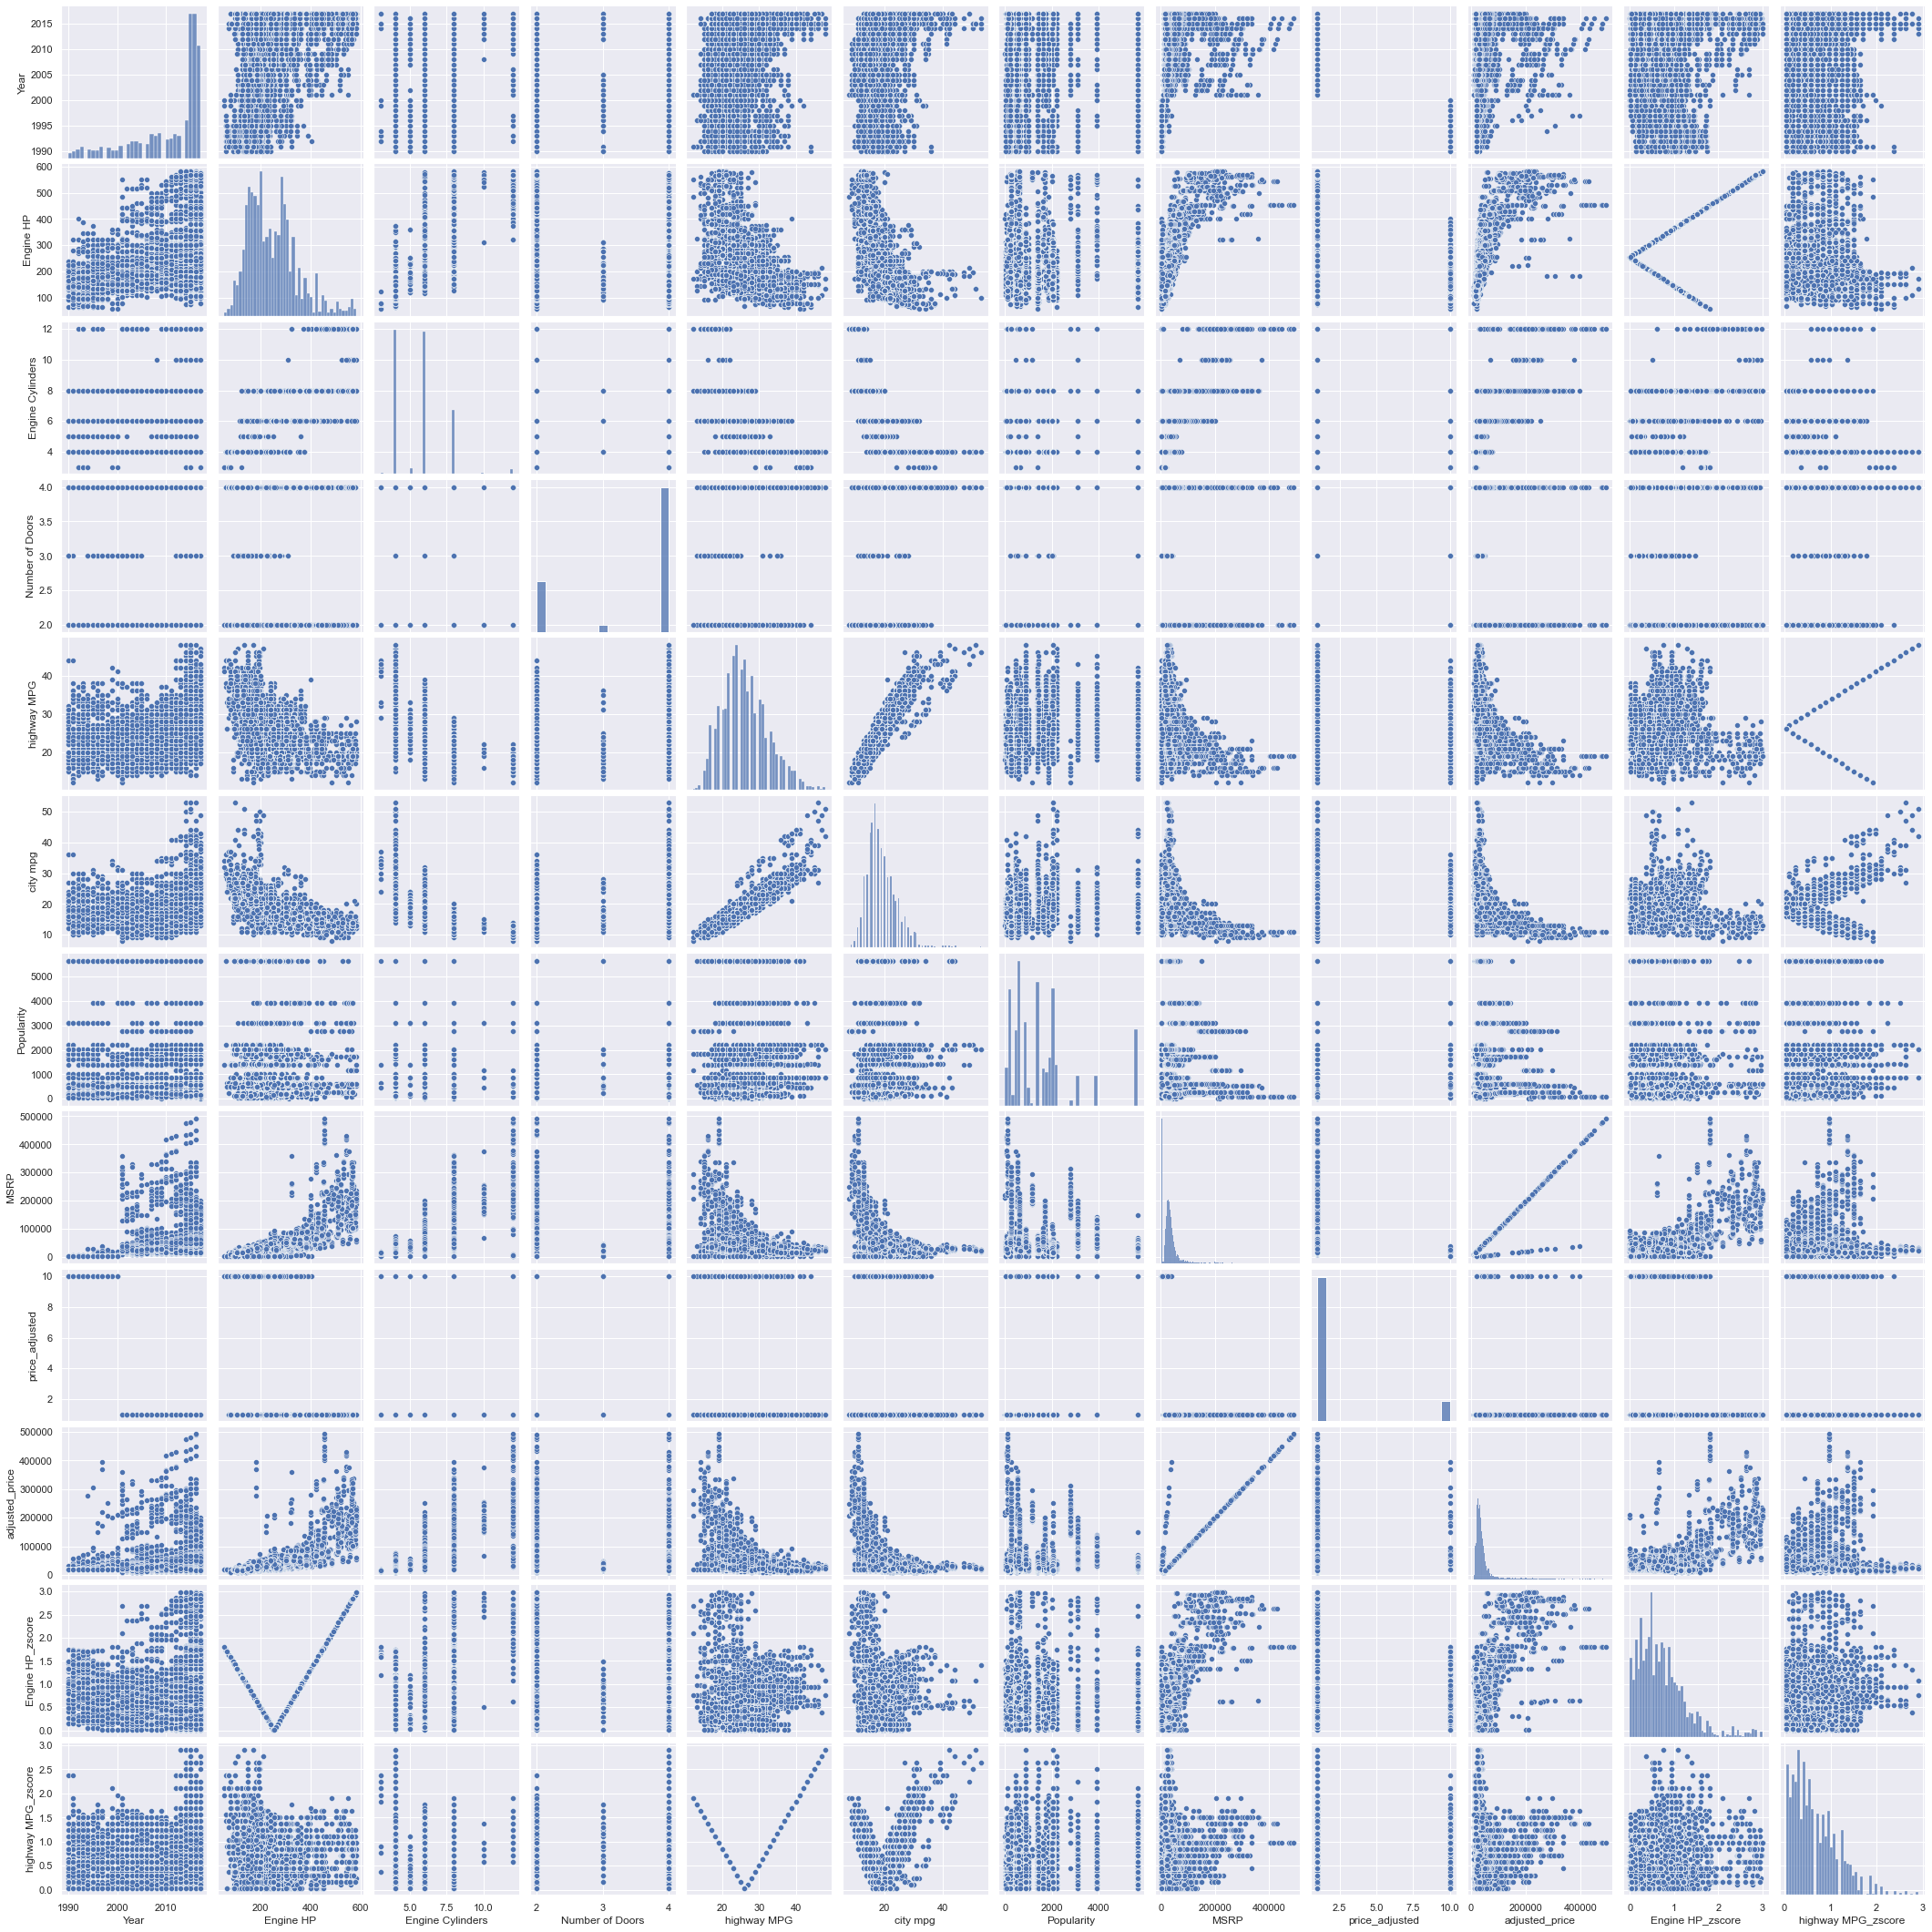

In [27]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(data=new_df);


In [28]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('The variables city MPG and highway MPG seem to have the strongest linear relationship.')



The variables city MPG and highway MPG seem to have the strongest linear relationship.


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

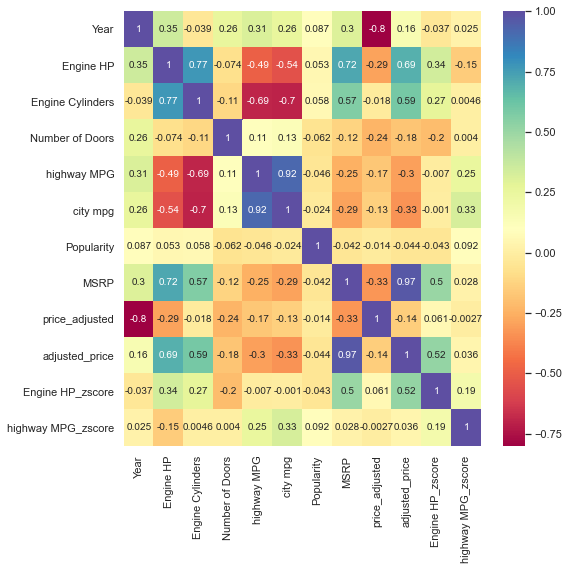

In [29]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize=(8,8))

ax = sns.heatmap(new_df.corr(), annot=True, cmap='Spectral')


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


